In [134]:
!pip install gdown
!gdown --id 1nnvTcZANfrHbt45FR8IYJm_YCQl40t5J --output employment_by_industry.csv

#https://drive.google.com/file/d/1nnvTcZANfrHbt45FR8IYJm_YCQl40t5J/view?usp=sharing

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nnvTcZANfrHbt45FR8IYJm_YCQl40t5J
To: /content/employment_by_industry.csv
100% 50.3k/50.3k [00:00<00:00, 77.8MB/s]


In [135]:
import pandas as pd
import re

In [136]:
# read_csv แบบไม่มีheader
df = pd.read_csv('employment_by_industry.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,ประเภท,ม.ค.-54,ก.พ.-54,มี.ค.-54,เม.ย.-54,พ.ค.-54,มิ.ย.-54,ก.ค.-54,ส.ค.-54,ก.ย.-54,...,มี.ค.-67,เม.ย.-67,พ.ค.-67,มิ.ย.-67,ก.ค.-67,ส.ค.-67,ก.ย.-67,ต.ค.-67,พ.ย.-67,ธ.ค.-67
1,1.ประชากรอายุ 15 ปีขึ้นไป 2/,53763.98,53807.77,53851.82,53896.25,53940.9,53985.98,54031.38,54071.77,54112.65,...,59120.35,59144.49,59169.1,59194.15,59219.51,59238.51,59257.85,59277.56,59297.75,59318.14
2,2.กำลังแรงงานรวม (2.1 + 2.2 + 2.3) 3/,38059.95,38076.26,38432.88,37929.78,38361.98,39125.98,39769.33,39761.34,39233.23,...,40450.23,39787.78,39989.62,40879.27,40437.74,40388.71,40699.05,40067.67,40849.34,40765.37
3,2.1.ผู้มีงานทำ 4/,37422.45,37553.57,37809.57,37370.29,37819.25,38886.3,39547.59,39437.69,38864.76,...,39789.1,39089.18,39140.25,40398.6,39966.57,39924.52,40320.1,39633.83,40420.91,40332.27
4,การทำงานต่ำระดับ 5/,464.19,398.47,340.67,580.88,305.26,268.61,228.54,236.39,335.19,...,167.59,181.66,170.3,160.58,216.64,193.87,143.58,204.53,171.03,263.8


<font size="4"><b>Data Cleansing</b></font>
* แก้ไข ชื่อ เดือน-ปี (พ.ศ.) เช่น ม.ค.-64 เปลี่ยนเป็น 01-24
* แก้ไขเนื้อหาข้อมูลที่มีช่องว่าง
* ลบข้อมูล ที่มีค่า n.a. ออก

In [137]:
# แก้ไขชื่อเดือน ของ row 0 โดยมีเงื่อนไขว่า แต่ละเดือนพบเจอคำนั้นในประโยคให้เปลี่ยน เช่น ม.ค.-64 เป็น 01-24
def convert_month_year(text):
  """
  Converts month-year strings like "ม.ค.-64" to "01-24".
  """
  if isinstance(text, str):
    if "ม.ค." in text:
      return text.replace("ม.ค.-", "01-")
    elif "ก.พ." in text:
      return text.replace("ก.พ.-", "02-")
    elif "มี.ค." in text:
      return text.replace("มี.ค.-", "03-")
    elif "เม.ย." in text:
      return text.replace("เม.ย.-", "04-")
    elif "พ.ค." in text:
      return text.replace("พ.ค.-", "05-")
    elif "มิ.ย." in text:
      return text.replace("มิ.ย.-", "06-")
    elif "ก.ค." in text:
      return text.replace("ก.ค.-", "07-")
    elif "ส.ค." in text:
      return text.replace("ส.ค.-", "08-")
    elif "ก.ย." in text:
      return text.replace("ก.ย.-", "09-")
    elif "ต.ค." in text:
      return text.replace("ต.ค.-", "10-")
    elif "พ.ย." in text:
      return text.replace("พ.ย.-", "11-")
    elif "ธ.ค. 2566 r" in text:
      return text.replace("ธ.ค. 2566 r", "12-66")
    elif "ธ.ค." in text:
      return text.replace("ธ.ค.-", "12-")


    # Add other month abbreviations as needed
  return text

# Apply the function to the 0th row
df.loc[0] = df.loc[0].apply(convert_month_year)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,ประเภท,01-54,02-54,03-54,04-54,05-54,06-54,07-54,08-54,09-54,...,03-67,04-67,05-67,06-67,07-67,08-67,09-67,10-67,11-67,12-67
1,1.ประชากรอายุ 15 ปีขึ้นไป 2/,53763.98,53807.77,53851.82,53896.25,53940.9,53985.98,54031.38,54071.77,54112.65,...,59120.35,59144.49,59169.1,59194.15,59219.51,59238.51,59257.85,59277.56,59297.75,59318.14
2,2.กำลังแรงงานรวม (2.1 + 2.2 + 2.3) 3/,38059.95,38076.26,38432.88,37929.78,38361.98,39125.98,39769.33,39761.34,39233.23,...,40450.23,39787.78,39989.62,40879.27,40437.74,40388.71,40699.05,40067.67,40849.34,40765.37
3,2.1.ผู้มีงานทำ 4/,37422.45,37553.57,37809.57,37370.29,37819.25,38886.3,39547.59,39437.69,38864.76,...,39789.1,39089.18,39140.25,40398.6,39966.57,39924.52,40320.1,39633.83,40420.91,40332.27
4,การทำงานต่ำระดับ 5/,464.19,398.47,340.67,580.88,305.26,268.61,228.54,236.39,335.19,...,167.59,181.66,170.3,160.58,216.64,193.87,143.58,204.53,171.03,263.8


In [138]:
# Set the first row as the header
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header


In [139]:
df['ประเภท'] = df['ประเภท'].str.strip()
df.head()

,ประเภท,01-54,02-54,03-54,04-54,05-54,06-54,07-54,08-54,09-54,...,03-67,04-67,05-67,06-67,07-67,08-67,09-67,10-67,11-67,12-67
1,1.ประชากรอายุ 15 ปีขึ้นไป 2/,53763.98,53807.77,53851.82,53896.25,53940.9,53985.98,54031.38,54071.77,54112.65,...,59120.35,59144.49,59169.1,59194.15,59219.51,59238.51,59257.85,59277.56,59297.75,59318.14
2,2.กำลังแรงงานรวม (2.1 + 2.2 + 2.3) 3/,38059.95,38076.26,38432.88,37929.78,38361.98,39125.98,39769.33,39761.34,39233.23,...,40450.23,39787.78,39989.62,40879.27,40437.74,40388.71,40699.05,40067.67,40849.34,40765.37
3,2.1.ผู้มีงานทำ 4/,37422.45,37553.57,37809.57,37370.29,37819.25,38886.3,39547.59,39437.69,38864.76,...,39789.1,39089.18,39140.25,40398.6,39966.57,39924.52,40320.1,39633.83,40420.91,40332.27
4,การทำงานต่ำระดับ 5/,464.19,398.47,340.67,580.88,305.26,268.61,228.54,236.39,335.19,...,167.59,181.66,170.3,160.58,216.64,193.87,143.58,204.53,171.03,263.8
5,2.1.1.ภาคการเกษตร,13355.69,12930.62,13068.96,12658.69,13626.4,15832.1,16544.11,16032.65,14764.44,...,11526.11,10099.73,10698.88,12586.45,11454.15,12474.64,12852.94,11100.1,12651.2,12141.35


In [140]:
df.iloc[0, 0] = 'ประชากรอายุ 15 ปีขึ้นไป'
df.iloc[33, 0] = 'ไม่อยู่ในกำลังแรงงานอายุ 15 ปีขึ้นไป'

In [141]:
# ฟังก์ชันลบตัวอักษรที่ไม่ใช่ภาษาไทย
def extract_thai(text):
    return "".join(re.findall(r'[\u0E00-\u0E7F]+', str(text)))

# ใช้ apply() เพื่อแปลงคอลัมน์ทั้งหมด
for index, row in df.iterrows():
  if index not in [1, 34]:
    df.loc[index, 'ประเภท'] = extract_thai(row['ประเภท'])

df.head()

,ประเภท,01-54,02-54,03-54,04-54,05-54,06-54,07-54,08-54,09-54,...,03-67,04-67,05-67,06-67,07-67,08-67,09-67,10-67,11-67,12-67
1,ประชากรอายุ 15 ปีขึ้นไป,53763.98,53807.77,53851.82,53896.25,53940.9,53985.98,54031.38,54071.77,54112.65,...,59120.35,59144.49,59169.1,59194.15,59219.51,59238.51,59257.85,59277.56,59297.75,59318.14
2,กำลังแรงงานรวม,38059.95,38076.26,38432.88,37929.78,38361.98,39125.98,39769.33,39761.34,39233.23,...,40450.23,39787.78,39989.62,40879.27,40437.74,40388.71,40699.05,40067.67,40849.34,40765.37
3,ผู้มีงานทำ,37422.45,37553.57,37809.57,37370.29,37819.25,38886.3,39547.59,39437.69,38864.76,...,39789.1,39089.18,39140.25,40398.6,39966.57,39924.52,40320.1,39633.83,40420.91,40332.27
4,การทำงานต่ำระดับ,464.19,398.47,340.67,580.88,305.26,268.61,228.54,236.39,335.19,...,167.59,181.66,170.3,160.58,216.64,193.87,143.58,204.53,171.03,263.8
5,ภาคการเกษตร,13355.69,12930.62,13068.96,12658.69,13626.4,15832.1,16544.11,16032.65,14764.44,...,11526.11,10099.73,10698.88,12586.45,11454.15,12474.64,12852.94,11100.1,12651.2,12141.35


In [142]:
# ดู column ที่มีคำว่า n.a.
na_column_count = df.columns[df.isin(['n.a.']).any()]
print( na_column_count )
print( f"จำนวนข้อมูลที่มี 'n.a.': {len(na_column_count)}" )

Index(['04-63', '05-63', '06-63', '01-64', '02-64', '03-64', '04-64', '05-64',
       '06-64', '07-64', '08-64', '09-64', '10-64', '11-64', '12-64', '01-65',
       '02-65', '03-65', '04-65', '05-65', '06-65', '07-65'],
      dtype='object', name=0)
จำนวนข้อมูลที่มี 'n.a.': 22


In [143]:
# ลบ column ที่มีคำว่า n.a.
df = df.drop(columns=df.columns[df.isin(['n.a.']).any()])
df.shape

(38, 147)

In [144]:
df

,ประเภท,01-54,02-54,03-54,04-54,05-54,06-54,07-54,08-54,09-54,...,03-67,04-67,05-67,06-67,07-67,08-67,09-67,10-67,11-67,12-67
1,ประชากรอายุ 15 ปีขึ้นไป,53763.98,53807.77,53851.82,53896.25,53940.9,53985.98,54031.38,54071.77,54112.65,...,59120.35,59144.49,59169.1,59194.15,59219.51,59238.51,59257.85,59277.56,59297.75,59318.14
2,กำลังแรงงานรวม,38059.95,38076.26,38432.88,37929.78,38361.98,39125.98,39769.33,39761.34,39233.23,...,40450.23,39787.78,39989.62,40879.27,40437.74,40388.71,40699.05,40067.67,40849.34,40765.37
3,ผู้มีงานทำ,37422.45,37553.57,37809.57,37370.29,37819.25,38886.3,39547.59,39437.69,38864.76,...,39789.1,39089.18,39140.25,40398.6,39966.57,39924.52,40320.1,39633.83,40420.91,40332.27
4,การทำงานต่ำระดับ,464.19,398.47,340.67,580.88,305.26,268.61,228.54,236.39,335.19,...,167.59,181.66,170.3,160.58,216.64,193.87,143.58,204.53,171.03,263.8
5,ภาคการเกษตร,13355.69,12930.62,13068.96,12658.69,13626.4,15832.1,16544.11,16032.65,14764.44,...,11526.11,10099.73,10698.88,12586.45,11454.15,12474.64,12852.94,11100.1,12651.2,12141.35
6,เกษตรกรรมการป่าไม้และการประมง,13355.69,12930.62,13068.96,12658.69,13626.4,15832.1,16544.11,16032.65,14764.44,...,11526.11,10099.73,10698.88,12586.45,11454.15,12474.64,12852.94,11100.1,12651.2,12141.35
7,นอกภาคการเกษตร,24066.78,24622.95,24740.6,24711.62,24192.85,23054.19,23003.46,23405.05,24100.31,...,28263,28989.48,28441.36,27812.14,28512.43,27449.89,27467.15,28533.73,27769.71,28190.92
8,การทำเหมืองแร่และเหมืองหิน,60.06,63.77,54.65,54.75,56.9,35.51,47.24,40.4,57.51,...,62.8,66.07,57.25,48.25,62.37,59.19,57.57,55.43,55.48,53.47
9,การผลิต,5687.19,5412.87,5787.03,5794.08,5613.86,5137.49,5427.15,5414.85,5503.5,...,6444.02,6311.94,6804.85,6345.33,6047.52,6490.76,6369.23,5933.37,6557.48,6625.59
10,ไฟฟ้าก๊าซไอน้ำและระบบปรับอากาศ,119.48,106.85,95.38,116.99,88.3,97.43,97.14,103.8,99.82,...,110,87.83,104.67,106.15,109.33,110.52,97.94,125.45,97.88,105.59


In [145]:
# Prepare data to create charts

#1 filter the DataFrame
'''
#filter rows 0 to 3 (inclusive of row 0, exclusive of row 3)
#filtered_df = df.iloc[0:3]
selected_rows = ['ประชากรอายุ 15 ปีขึ้นไป','กำลังแรงงานรวม', 'ผู้มีงานทำ']
filtered_df = df[df['ประเภท'].isin(selected_rows)]
'''
filtered_df=df #not filter anything

#2 Unpivot the DataFrame
unpivoted_df = pd.melt(filtered_df, id_vars=['ประเภท'],
                       value_vars=filtered_df.columns[1:],# unpivot ตั้งเเต่ column 1 เป็นต้นไป
                       var_name='MM-YY', value_name='หน่วย:พันคน')

#3 Group by 'ปี(พ.ศ.)' and 'ประเภท' and calculate the average of 'pers(x1000)'
unpivoted_df['ปี(พ.ศ.)'] = unpivoted_df['MM-YY'].str[-2:]# Create a new column with the last two characters from the 'MM-YY' column
unpivoted_df['ปี(พ.ศ.)'] = unpivoted_df['ปี(พ.ศ.)'].astype(int) + 2500
unpivoted_df['ปี(พ.ศ.)'] = unpivoted_df['ปี(พ.ศ.)'].astype(str)
unpivoted_df['หน่วย:พันคน'] = pd.to_numeric(unpivoted_df['หน่วย:พันคน'], errors='coerce')# Convert 'pers(x1000)' to numeric, handling errors
average_df = unpivoted_df.groupby(['ปี(พ.ศ.)', 'ประเภท'], sort=False)['หน่วย:พันคน'].mean().reset_index()
#display(average_df.head(10))

#4 Piviot the DataFram for additional calculation
pivoted_df = average_df.pivot(index='ปี(พ.ศ.)', columns='ประเภท', values='หน่วย:พันคน').reset_index()
#display(pivoted_df.head(10))

#5 Unpivot the DataFrame
prepared_df = pd.melt(pivoted_df, id_vars=['ปี(พ.ศ.)'],
                       value_vars=pivoted_df.columns[1:],# unpivot ตั้งเเต่ column 1 เป็นต้นไป
                       var_name='ประเภท', value_name='หน่วย:พันคน')
prepared_df = prepared_df.sort_values(by=['ปี(พ.ศ.)','ประเภท'], ascending=True).reset_index(drop=True)
prepared_df

,ปี(พ.ศ.),ประเภท,หน่วย:พันคน
0,2554,การก่อสร้าง,2375.550833
1,2554,การขนส่งและสถานที่เก็บสินค้า,971.895000
2,2554,การขายส่งและการขายปลีกการซ่อมยานยนต์และรถจักรย...,6010.537500
3,2554,การจัดหาน้ำการจัดการและการบำบัดน้ำเสียของเสียแ...,89.028333
4,2554,การทำงานต่ำระดับ,364.032500
...,...,...,...
489,2567,เรียนหนังสือ,4604.280000
490,2567,ไฟฟ้าก๊าซไอน้ำและระบบปรับอากาศ,104.355000
491,2567,ไม่ทราบ,65.510000
492,2567,ไม่อยู่ในกำลังแรงงานอายุ 15 ปีขึ้นไป,18812.036667


In [146]:
# Install Thai front
!pip install fontTools
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
from matplotlib import font_manager
import matplotlib.pyplot as plt
from fontTools import ttLib

font_dir = 'thsarabunnew-webfont.ttf'  # Specify where the font file is stored
font_manager.fontManager.addfont(font_dir)
font = ttLib.TTFont(font_dir)
font_familyname = font['name'].getDebugName(1)
font_fullname = font['name'].getDebugName(4)

print(f"family name: {font_familyname} , full name: {font_fullname}")

--2025-03-30 00:47:07--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2025-03-30 00:47:07--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.2’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2025-03-30 00:47:07 (3.92 MB/s) - 

 ## Mini-Project: การวิเคราะห์สภาวะการทำงานของประชากรในประเทศไทย (Labour Force Survey)
<p><font size="4">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;แรงงานเป็นปัจจัยสำคัญในการขับเคลื่อนเศรษฐกิจของประเทศ การทำความเข้าใจโครงสร้างและแนวโน้มของกำลังแรงงานจึงเป็นสิ่งจำเป็นในการกำหนดนโยบายทางเศรษฐกิจและสังคม
<p ><font size="4">&nbsp;&nbsp;&nbsp;Mini-project นี้มุ่งเน้นการวิเคราะห์ข้อมูลจากการสำรวจภาวะการทำงานของประชากรในประเทศไทย ที่มีอายุ 15 ปีขึ้นไป เพื่อให้เห็นภาพรวมของสถานการณ์แรงงานในปัจจุบัน รวมถึงแนวโน้มการเปลี่ยนแปลงของกลุ่มแรงงานในภาคส่วนต่าง ๆ
โดยการวิเคราะห์ครั้งนี้กลุ่มของเราจะมุ่งเน้นไปที่ 3 ส่วนหลักๆได้แก่</font></p>
<p ><font size="4">&nbsp;&nbsp;&nbsp;Part 1: การวิเคราะห์ภาพรวมของประชากรที่มีอายุ 15 ปีขึ้นไป</font></p>
<p><font size="4">&nbsp;&nbsp;&nbsp;Part 2: การวิเคราะห์กลุ่มที่เป็นกำลังแรงงานในภาคการเกษตร</font></p>
<p><font size="4">&nbsp;&nbsp;&nbsp;Part 3: การวิเคราะห์กลุ่มที่เป็นกำลังแรงงานนอกภาคการเกษตร</font></p>

<p><b><font size="5">Part 1: การวิเคราะห์ภาพรวมของประชากรที่มีอายุ 15 ปีขึ้นไป</font></b> <font size="4">
</font size="5"><p>
<p><font size="4">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;นำเสนอข้อมูลประชากรที่มีอายุ 15 ปีขึ้นไป โดยแบ่งออกเป็นกลุ่มที่อยู่ในกำลังแรงงานและกลุ่มที่ไม่ได้อยู่ในกำลังแรงงาน เพื่อให้เห็นแนวโน้มการเปลี่ยนแปลงของโครงสร้างแรงงานในช่วงเวลาที่ผ่านมาตั้งแต่ปี พ.ศ.2554 - พ.ศ.2567</font></p>


**Insigth ที่ต้องการหาคำตอบ**
*   เเนวโน้มของจำนวนประชากรในประเทศไทย
*   สัดส่วนของประชากรกลุ่มที่เป็นกำลังเเรงงานเเละกลุ่มที่ไม่เป็นกำลังเเรงงาน
*   อัตราการเกิดการการตายของประชากรในประเทศไทย


In [147]:
# @title
# Import library and set main common parameters
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

params = {'figure.dpi':150,
          'font.family':font_familyname,
          'legend.fontsize':'small',
          'axes.labelsize':'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'}

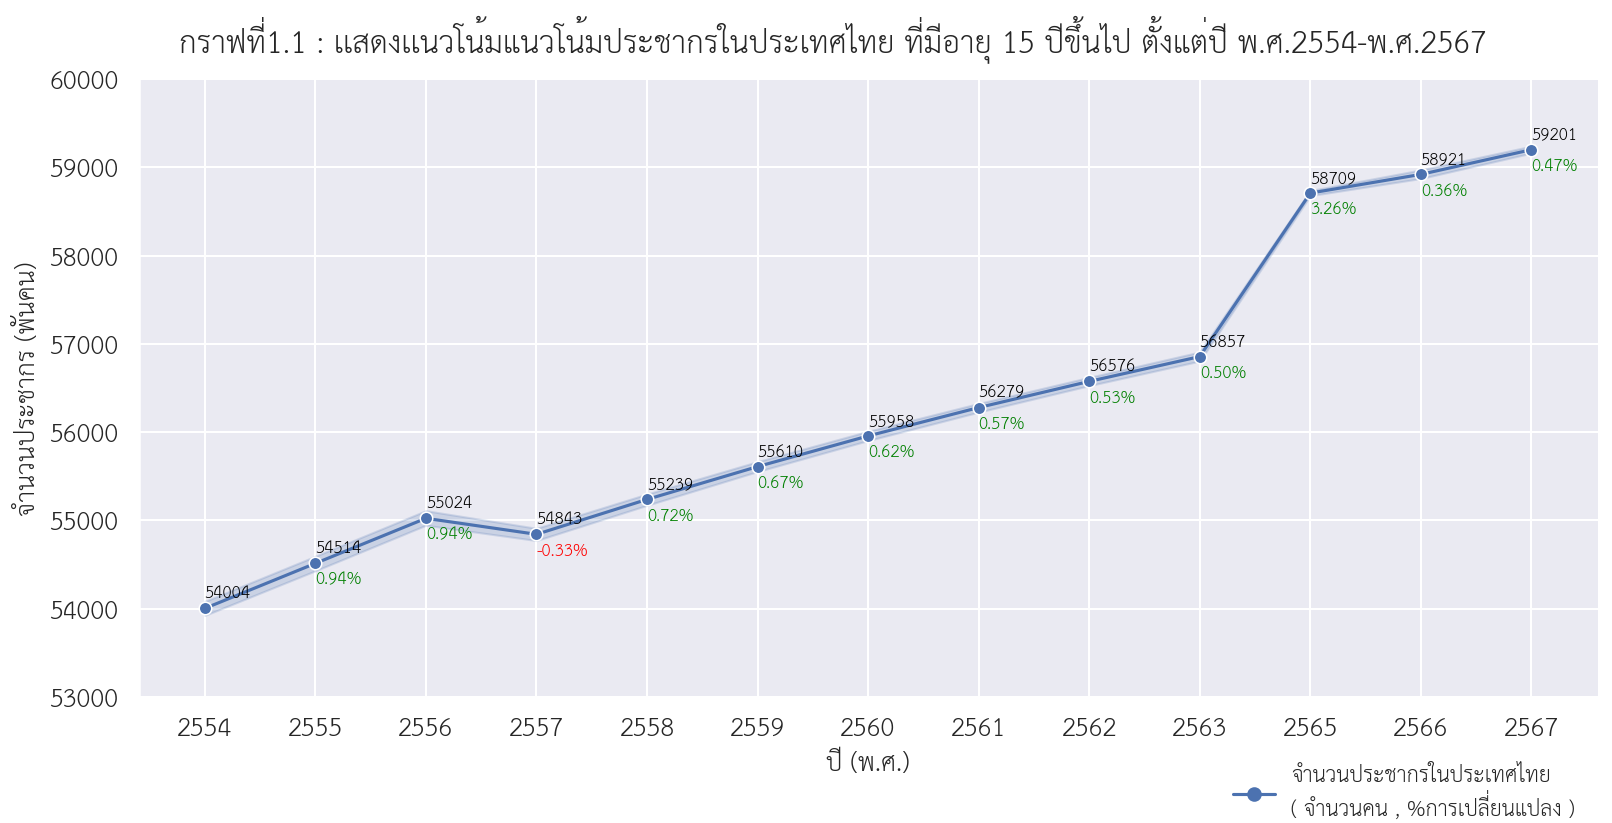

In [148]:
# @title
#1.1 กราฟเเสดงเเนวโน้มแนวโน้มประชากรอายุ 15 ปีขึ้นไปตั้งแต่ปี พ.ศ.2554-พ.ศ.2567
# Figure setting
sns.set(rc=params)

# Calculate the percentage change compared to the previous year
selected_rows = ['ประชากรอายุ 15 ปีขึ้นไป']
df_selected = prepared_df[prepared_df['ประเภท'].isin(selected_rows)].copy()  # Make an explicit copy to avoid the warning
df_selected.loc[:, 'Percentage Change'] = df_selected.groupby('ประเภท')['หน่วย:พันคน'].pct_change() * 100
df_selected = df_selected.dropna(subset=['Percentage Change'])

# Create a line plot using seaborn
selected_rows = ['ประชากรอายุ 15 ปีขึ้นไป']
g=sns.relplot(data = unpivoted_df[unpivoted_df['ประเภท'].isin(selected_rows)],
            kind ='line',
            x = 'ปี(พ.ศ.)',
            y = 'หน่วย:พันคน',
            hue = 'ประเภท' ,
            hue_order=['ประชากรอายุ 15 ปีขึ้นไป'],
            size = None ,
            style = None ,
            col= None ,
            row = None,
            height=5,
            aspect=2.5,
            alpha = 1 ,
            markers = True,
            marker='o')

# Set format chart
g.fig.set_size_inches(12.5, 5)# Set the figure size
g.fig.suptitle('กราฟที่1.1 : เเสดงเเนวโน้มแนวโน้มประชากรในประเทศไทย ที่มีอายุ 15 ปีขึ้นไป ตั้งแต่ปี พ.ศ.2554-พ.ศ.2567', y=1.05, x=0.45)# Add title to the chart
g.set_axis_labels('ปี (พ.ศ.)', 'จำนวนประชากร (พันคน)')# Add axis labels (x,y)
ax = g.ax
ax.xaxis.grid(True) # Set grid
ax.yaxis.grid(True) # Set grid
ax.set(ylim=(53000, 60000)) # Set major y-axis
ax.yaxis.set_major_locator(MultipleLocator(1000)) # Set minor y-axis
ax.set_xticks(prepared_df['ปี(พ.ศ.)'].unique()) # Set x-axis ticks and labels to show every label
ax.set_xticklabels(prepared_df['ปี(พ.ศ.)'].unique(), rotation=0, ha='center') # Set x-axis

# Add y-values and Percentage Change to the line graph
for x, y in zip(prepared_df['ปี(พ.ศ.)'].unique(), ax.lines[0].get_ydata()):
    # Add the y-value annotation
    ax.annotate(f'{y:.0f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')

    # Find the corresponding Percentage Change value
    percentage_change = df_selected[df_selected['ปี(พ.ศ.)'] == x]['Percentage Change'].values
    if len(percentage_change) > 0:
        # Determine the color based on the sign of the percentage change
        color = 'green' if percentage_change[0] > 0 else 'red'

        # Add the percentage change annotation with dynamic color
        ax.annotate(f'{percentage_change[0]:.2f}%',
                    xy=(x, y),
                    xytext=(0, -10),
                    textcoords='offset points',
                    fontsize=8,
                    color=color)

# Set Legend
g._legend.set_title('')
new_labels = ['จำนวนประชากรในประเทศไทย\n( จำนวนคน , %การเปลี่ยนแปลง )']
for text, new_label in zip(g._legend.get_texts(), new_labels):
    text.set_text(new_label)
g._legend.set_bbox_to_anchor((0.85, 0.04))

plt.show()

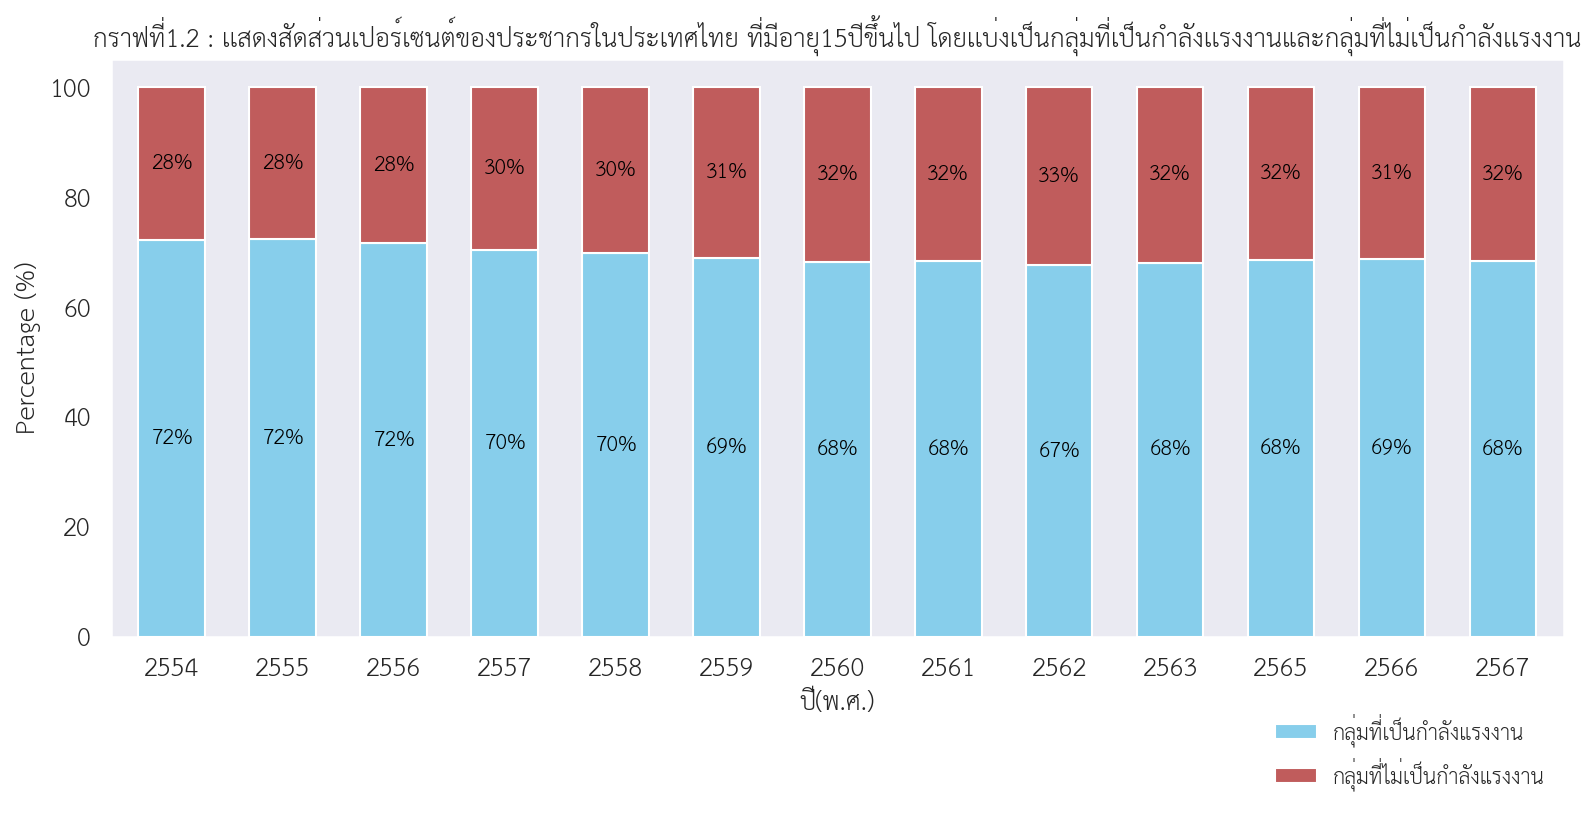

In [149]:
# @title
#1.2 กราฟแสดง สัดส่วนของประชากรอายุ 15ปี ขึ้นไป ที่เป็นกำลังเเรงงานและไม่เป็นกำลังเเรงงาน (%)

# Figure setting
sns.set(rc=params)

# Prepare data for stacked bar plot
# Pivot data to create separate columns for each category
selected_rows_bar = ['กำลังแรงงานรวม','ไม่อยู่ในกำลังแรงงานอายุ 15 ปีขึ้นไป']
pivot_df = prepared_df[prepared_df['ประเภท'].isin(selected_rows_bar)].pivot(index='ปี(พ.ศ.)', columns='ประเภท', values='หน่วย:พันคน')

# Normalize data to make it 100%
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Set the figure size
fig, ax = plt.subplots(figsize=(12.5, 5))

# Plot the stacked bar plot with the correct bar width
pivot_df.plot(kind='bar', stacked=True, ax=ax, width=0.6, color=['#87CEEB', '#C05C5C'])

# Customize the plot
ax.set_ylabel('Percentage (%)')
ax.set_title('กราฟที่1.2 : เเสดงสัดส่วนเปอร์เซนต์ของประชากรในประเทศไทย ที่มีอายุ15ปีขึ้นไป โดยเเบ่งเป็นกลุ่มที่เป็นกำลังเเรงงานและกลุ่มที่ไม่เป็นกำลังเเรงงาน' , fontsize='medium')
ax.legend(title='ประเภท')
ax.xaxis.grid(False) # Set grid
ax.yaxis.grid(False) # Set grid
plt.xticks(rotation=0)

# Add the y-labels (percentage values) to each stack
for p in ax.patches:
    height = p.get_height()  # The height of each stack
    width = p.get_width()  # The width of the stack
    x = p.get_x() + width / 2  # The x position of the stack (centered)
    y = p.get_y() + height / 2  # The y position of the stack (centered)
    ax.annotate(f'{height:.0f}%', (x, y), ha='center', va='center', color='black', fontsize=10)# Add text annotation (percentage)

# set legend labels and position
custom_labels = ['กลุ่มที่เป็นกำลังแรงงาน', 'กลุ่มที่ไม่เป็นกำลังแรงงาน']
ax.legend(title='', labels=custom_labels, bbox_to_anchor=(1, -0.1),frameon=False)

plt.show()

จากกราฟที่ 1 แสดงให้เห็นว่าจำนวนประชากรในประเทศไทย ที่มีอายุ 15 ปีขึ้นไป มีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่อง โดยเฉพาะช่วงปี 2563-2565 ที่มีการเติบโตสูงขึ้นถึง3% โดยพบว่าช่วงเวลาดังกล่าวคือช่วงที่เกิดโรคระบาดโควิด19 แต่หลังจากนั้นอัตราการเพิ่มขึ้นเริ่มชะลอตัวซึ่งอาจเป็นสัญญาณของการเข้าสู่สังคมผู้สูงอายุ
โดยการเปลี่ยนแปลงนี้จะส่งผลต่อโครงสร้างตลาดแรงงานและเศรษฐกิจไทยในระยะยาว'
เเละสิ่งที่น่าสนใจอีกประเด็นคือเราพบว่าสัดส่วนของกลุ่มที่เป็นกำลังเเรงงานเเละกลุ่มที่ไม่เป็นกำลังเเรงงานมีอัตราการเปลี่ยนเเปลงที่น้อยมาก

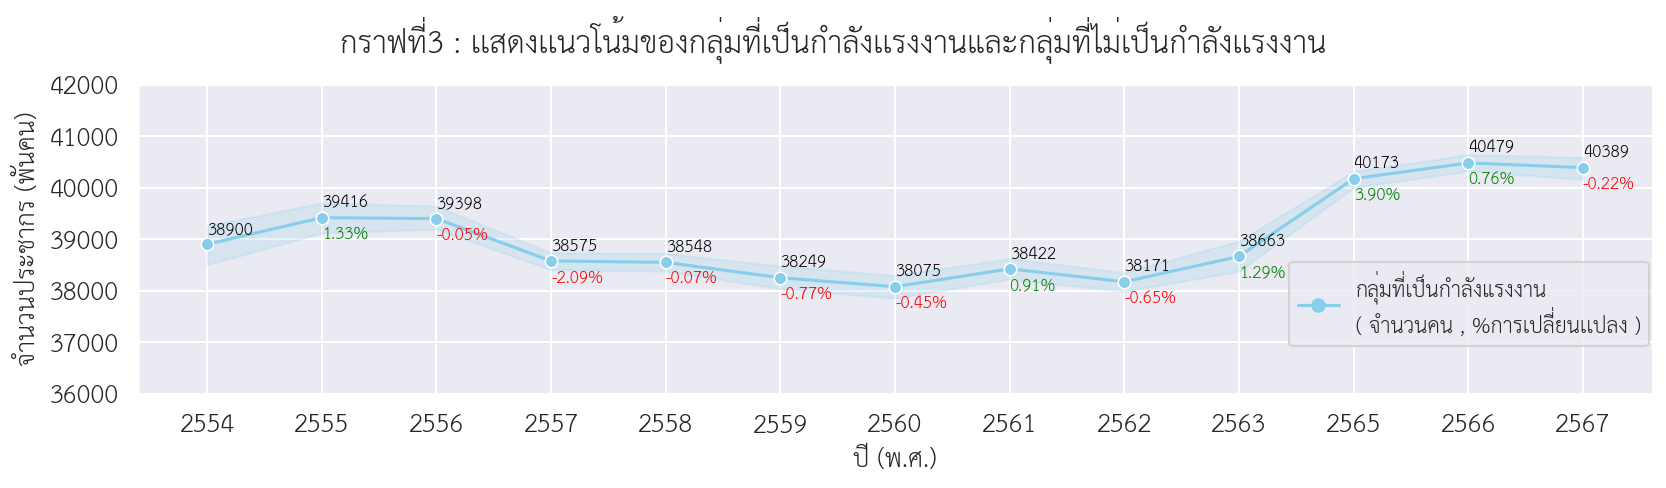

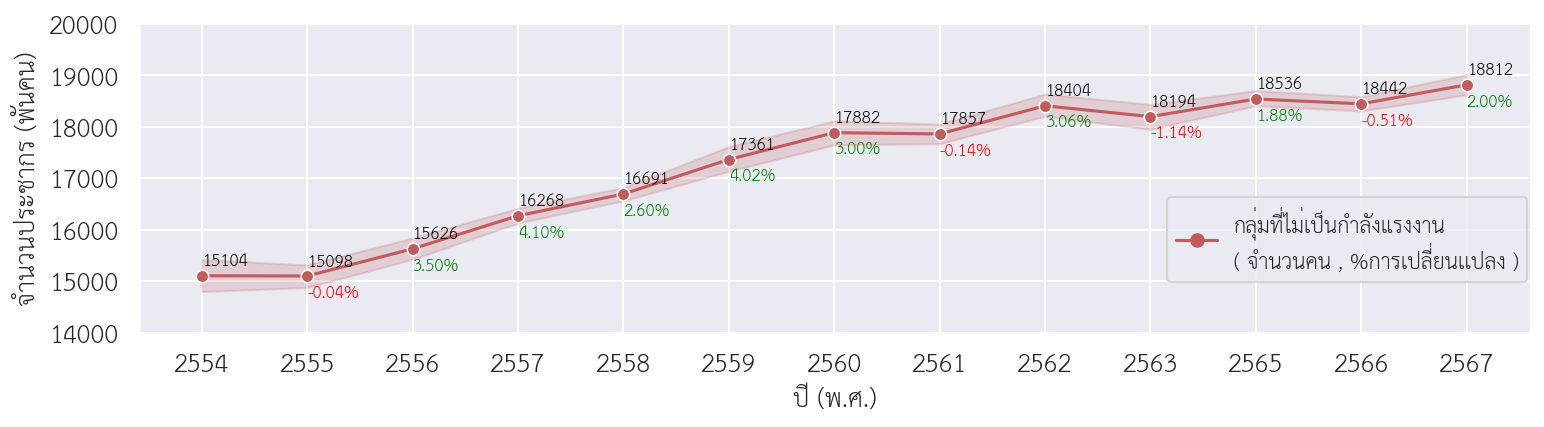

In [150]:
# @title
#3. กราฟเเสดงเเนวโน้มของกลุ่มที่เป็นกำลังเเรงงานและกลุ่มที่ไม่เป็นกำลังเเรงงาน

# Figure setting
sns.set(rc=params)

# Calculate the percentage change compared to the previous year
selected_rows = ['กำลังแรงงานรวม']
df_selected = prepared_df[prepared_df['ประเภท'].isin(selected_rows)].copy()  # Make an explicit copy to avoid the warning
df_selected.loc[:, 'Percentage Change'] = df_selected.groupby('ประเภท')['หน่วย:พันคน'].pct_change() * 100
df_selected = df_selected.dropna(subset=['Percentage Change'])

# Create a line plot using seaborn
selected_rows = ['กำลังแรงงานรวม']
g=sns.relplot(data = unpivoted_df[unpivoted_df['ประเภท'].isin(selected_rows)],
            kind ='line',
            x = 'ปี(พ.ศ.)',
            y = 'หน่วย:พันคน',
            hue = 'ประเภท' ,
            hue_order=['กำลังแรงงานรวม'],
            size = None ,
            style = None ,
            col= None ,
            row = None,
            height=5,
            aspect=2.5,
            alpha = 1,
            markers = True,
            marker='o',
            palette=['#87CEEB'],
              )

# Set format chart
g.fig.set_size_inches(12.5, 2.5)# Set the figure size
g.fig.suptitle('กราฟที่3 : เเสดงเเนวโน้มของกลุ่มที่เป็นกำลังเเรงงานและกลุ่มที่ไม่เป็นกำลังเเรงงาน', y=1.15, x=0.45)# Add title to the chart
g.set_axis_labels('ปี (พ.ศ.)', 'จำนวนประชากร (พันคน)')# Add axis labels (x,y)
ax = g.ax
ax.xaxis.grid(True) # Set grid
ax.yaxis.grid(True) # Set grid
ax.set(ylim=(36000, 42000)) # Set major y-axis
ax.yaxis.set_major_locator(MultipleLocator(1000)) # Set minor y-axis
ax.set_xticks(prepared_df['ปี(พ.ศ.)'].unique()) # Set x-axis ticks and labels to show every label
ax.set_xticklabels(prepared_df['ปี(พ.ศ.)'].unique(), rotation=0, ha='center') # Set x-axis

# Add y-values and Percentage Change to the line graph
for x, y in zip(prepared_df['ปี(พ.ศ.)'].unique(), ax.lines[0].get_ydata()):
    # Add the y-value annotation
    ax.annotate(f'{y:.0f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')

    # Find the corresponding Percentage Change value
    percentage_change = df_selected[df_selected['ปี(พ.ศ.)'] == x]['Percentage Change'].values
    if len(percentage_change) > 0:
        # Determine the color based on the sign of the percentage change
        color = 'green' if percentage_change[0] > 0 else 'red'

        # Add the percentage change annotation with dynamic color
        ax.annotate(f'{percentage_change[0]:.2f}%',
                    xy=(x, y),
                    xytext=(0, -10),
                    textcoords='offset points',
                    fontsize=8,
                    color=color)

# Set Legend
g._legend.set_title('')
new_labels = ['กลุ่มที่เป็นกำลังแรงงาน\n( จำนวนคน , %การเปลี่ยนเเปลง )']
for text, new_label in zip(g._legend.get_texts(), new_labels):
    text.set_text(new_label)
g._legend.set_bbox_to_anchor((0.885, 0.49))
g._legend.set_frame_on(True)  # Ensure the frame is on (makes it visible)

# Calculate the percentage change compared to the previous year
selected_rows = ['ไม่อยู่ในกำลังแรงงานอายุ 15 ปีขึ้นไป']
df_selected = prepared_df[prepared_df['ประเภท'].isin(selected_rows)].copy()  # Make an explicit copy to avoid the warning
df_selected.loc[:, 'Percentage Change'] = df_selected.groupby('ประเภท')['หน่วย:พันคน'].pct_change() * 100
df_selected = df_selected.dropna(subset=['Percentage Change'])

# Create a line plot using seaborn
selected_rows = ['ไม่อยู่ในกำลังแรงงานอายุ 15 ปีขึ้นไป']
g=sns.relplot(data = unpivoted_df[unpivoted_df['ประเภท'].isin(selected_rows)],
            kind ='line',
            x = 'ปี(พ.ศ.)',
            y = 'หน่วย:พันคน',
            hue = 'ประเภท' ,
            hue_order=['ไม่อยู่ในกำลังแรงงานอายุ 15 ปีขึ้นไป',],
            size = None ,
            style = None ,
            col= None ,
            row = None,
            height=5,
            aspect=2.5,
            alpha = 1,
            markers = True,
            marker='o',
            palette=['#C05C5C'])

# Set format chart
g.fig.set_size_inches(12.5, 2.5)# Set the figure size
#g.fig.suptitle('กราฟที่2 : เเสดงเเนวโน้มของกลุ่มที่เป็นกำลังเเรงงานและกลุ่มที่ไม่เป็นกำลังเเรงงาน', y=1.15, x=0.45)# Add title to the chart
g.set_axis_labels('ปี (พ.ศ.)', 'จำนวนประชากร (พันคน)')# Add axis labels (x,y)
ax = g.ax
ax.xaxis.grid(True) # Set grid
ax.yaxis.grid(True) # Set grid
ax.set(ylim=(14000, 20000)) # Set major y-axis
ax.yaxis.set_major_locator(MultipleLocator(1000)) # Set minor y-axis
ax.set_xticks(prepared_df['ปี(พ.ศ.)'].unique()) # Set x-axis ticks and labels to show every label
ax.set_xticklabels(prepared_df['ปี(พ.ศ.)'].unique(), rotation=0, ha='center') # Set x-axis

# Add y-values and Percentage Change to the line graph
for x, y in zip(prepared_df['ปี(พ.ศ.)'].unique(), ax.lines[0].get_ydata()):
    # Add the y-value annotation
    ax.annotate(f'{y:.0f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')

    # Find the corresponding Percentage Change value
    percentage_change = df_selected[df_selected['ปี(พ.ศ.)'] == x]['Percentage Change'].values
    if len(percentage_change) > 0:
        # Determine the color based on the sign of the percentage change
        color = 'green' if percentage_change[0] > 0 else 'red'

        # Add the percentage change annotation with dynamic color
        ax.annotate(f'{percentage_change[0]:.2f}%',
                    xy=(x, y),
                    xytext=(0, -10),
                    textcoords='offset points',
                    fontsize=8,
                    color=color)

# Set Legend
g._legend.set_title('')
new_labels = ['กลุ่มที่ไม่เป็นกำลังแรงงาน\n( จำนวนคน , %การเปลี่ยนเเปลง )']
for text, new_label in zip(g._legend.get_texts(), new_labels):
    text.set_text(new_label)
g._legend.set_bbox_to_anchor((0.82, 0.5))
g._legend.set_frame_on(True)

plt.show()

Add >> อัตราการเกิดการตาย

Part2: นอกเหนือจากสัดส่วนของกำลังแรงงานทั้งหมดแล้ว การกระจายตัวของกำลังแรงงานในแต่ละภาคส่วนก็เป็นอีกหนึ่งตัวชี้วัดที่สำคัญ โดยเฉพาะอย่างยิ่งการเปรียบเทียบระหว่างภาคการเกษตรและนอกภาคการเกษตร ซึ่งจะทำให้เราเห็นภาพรวมของโครงสร้างเศรษฐกิจไทยได้ชัดเจนยิ่งขึ้น

จากข้อมูลจำนวนแรงงานทั้งหมด กราฟนี้แสดงให้เห็นถึงการกระจายตัวของแรงงานในสองภาคส่วนหลัก ได้แก่ ภาคการเกษตรและนอกภาคการเกษตร โดยจะเห็นได้ถึงแนวโน้มการเปลี่ยนแปลงของจำนวนแรงงานในแต่ละภาคส่วน

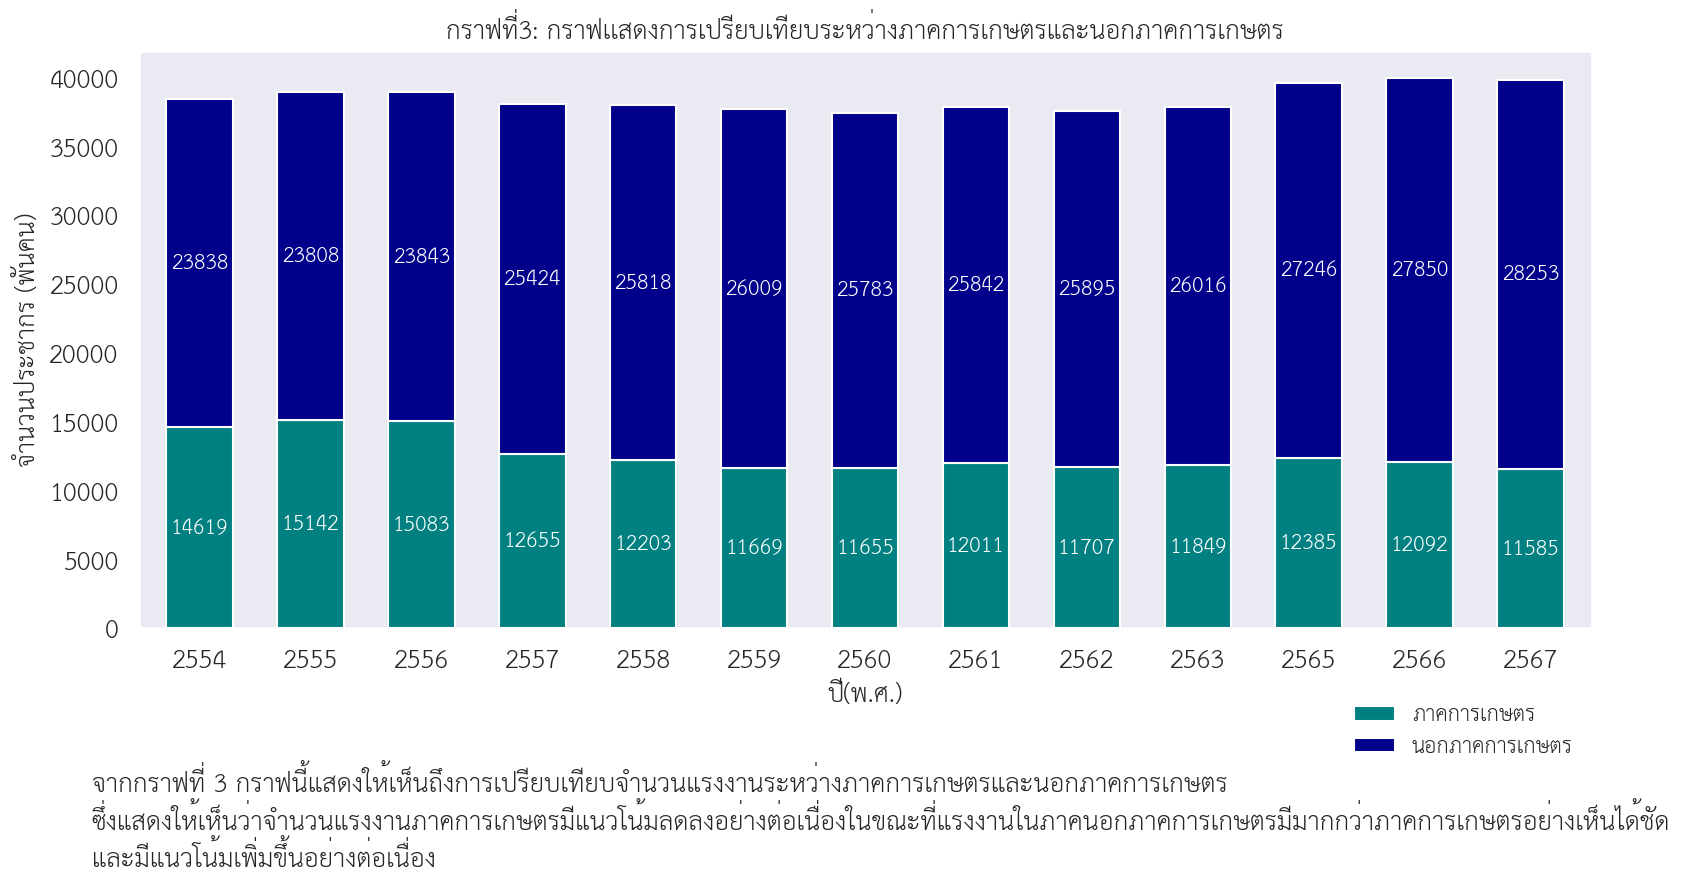

In [151]:
# @title
#3 กราฟแสดง สัดส่วนของประชากรอายุ 15ปี ขึ้นไป ที่เป็นกำลังเเรงงานและไม่เป็นกำลังเเรงงาน (%)
# Prepare data for stacked bar plot
# Pivot data to create separate columns for each category
selected_rows_bar = ['ภาคการเกษตร','นอกภาคการเกษตร']
pivot_df = prepared_df[prepared_df['ประเภท'].isin(selected_rows_bar)].pivot(index='ปี(พ.ศ.)', columns='ประเภท', values='หน่วย:พันคน')
pivot_df = pivot_df[['ภาคการเกษตร', 'นอกภาคการเกษตร']]

# Normalize data to make it 100%
#pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Set the figure size
fig, ax = plt.subplots(figsize=(12.5, 5))


# Plot the stacked bar plot with the correct bar width
pivot_df.plot(kind='bar', stacked=True, ax=ax, width=0.6,color=['teal','darkblue'])

# Customize the plot
ax.set_ylabel('จำนวนประชากร (พันคน)')
ax.set_title('กราฟที่3: กราฟเเสดงการเปรียบเทียบระหว่างภาคการเกษตรและนอกภาคการเกษตร')
ax.legend(title='ประเภท')
ax.xaxis.grid(False) # Set grid
ax.yaxis.grid(False) # Set grid
plt.xticks(rotation=0)

# Add the y-labels (percentage values) to each stack
for p in ax.patches:
    height = p.get_height()  # The height of each stack
    width = p.get_width()  # The width of the stack
    x = p.get_x() + width / 2  # The x position of the stack (centered)
    y = p.get_y() + height / 2  # The y position of the stack (centered)
    ax.annotate(f'{height:.0f}', (x, y), ha='center', va='center', color='white', fontsize=10)# Add text annotation (percentage)

# set legend labels and position
custom_labels = ['ภาคการเกษตร','นอกภาคการเกษตร']
ax.legend(title='', labels=custom_labels, bbox_to_anchor=(1, -0.1),frameon=False)

# Add a comment below the chart
plt.figtext(0.1, -0.2, 'จากกราฟที่ 3 กราฟนี้แสดงให้เห็นถึงการเปรียบเทียบจำนวนแรงงานระหว่างภาคการเกษตรและนอกภาคการเกษตร ซึ่งแสดงให้เห็นว่าจำนวนแรงงานภาคการเกษตรมีแนวโน้มลดลงอย่างต่อเนื่อง'
                                  'ในขณะที่แรงงานในภาคนอกภาคการเกษตรมีมากกว่าภาคการเกษตรอย่างเห็นได้ชัด และมีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่อง'
                         , ha='left', fontsize=12, wrap=True)
plt.show()

In [152]:
# กราฟที่ xx วิเคราะห์รายได้ของภาคการเกษตรในช่วงปี พ.ศ.2554-พ.ศ.2566

!pip install gdown
!gdown --id 194JZZTOIYbad37UDOdwTjbOIrJy82zHi --output ดรรชนีราคาสินค้า.csv

#https://drive.google.com/file/d/194JZZTOIYbad37UDOdwTjbOIrJy82zHi/view?usp=sharing

# read_csv แบบมีheader
df4 = pd.read_csv('ดรรชนีราคาสินค้า.csv', header=0)
df4['Year'] = df4['Year'].astype(str)
display(df4)


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=194JZZTOIYbad37UDOdwTjbOIrJy82zHi
To: /content/ดรรชนีราคาสินค้า.csv
100% 3.49k/3.49k [00:00<00:00, 9.69MB/s]


,ประเภท,Year,ดรรชนีราคาสินค้า
0,1. หมวดพืชผลสำคัญ,2548,100.000000
1,1. หมวดพืชผลสำคัญ,2549,114.289085
2,1. หมวดพืชผลสำคัญ,2550,121.391185
3,1. หมวดพืชผลสำคัญ,2551,146.786569
4,1. หมวดพืชผลสำคัญ,2552,130.625063
5,1. หมวดพืชผลสำคัญ,2553,169.781828
6,1. หมวดพืชผลสำคัญ,2554,191.475280
7,1. หมวดพืชผลสำคัญ,2555,169.424226
8,1. หมวดพืชผลสำคัญ,2556,158.129708
9,1. หมวดพืชผลสำคัญ,2557,140.878426


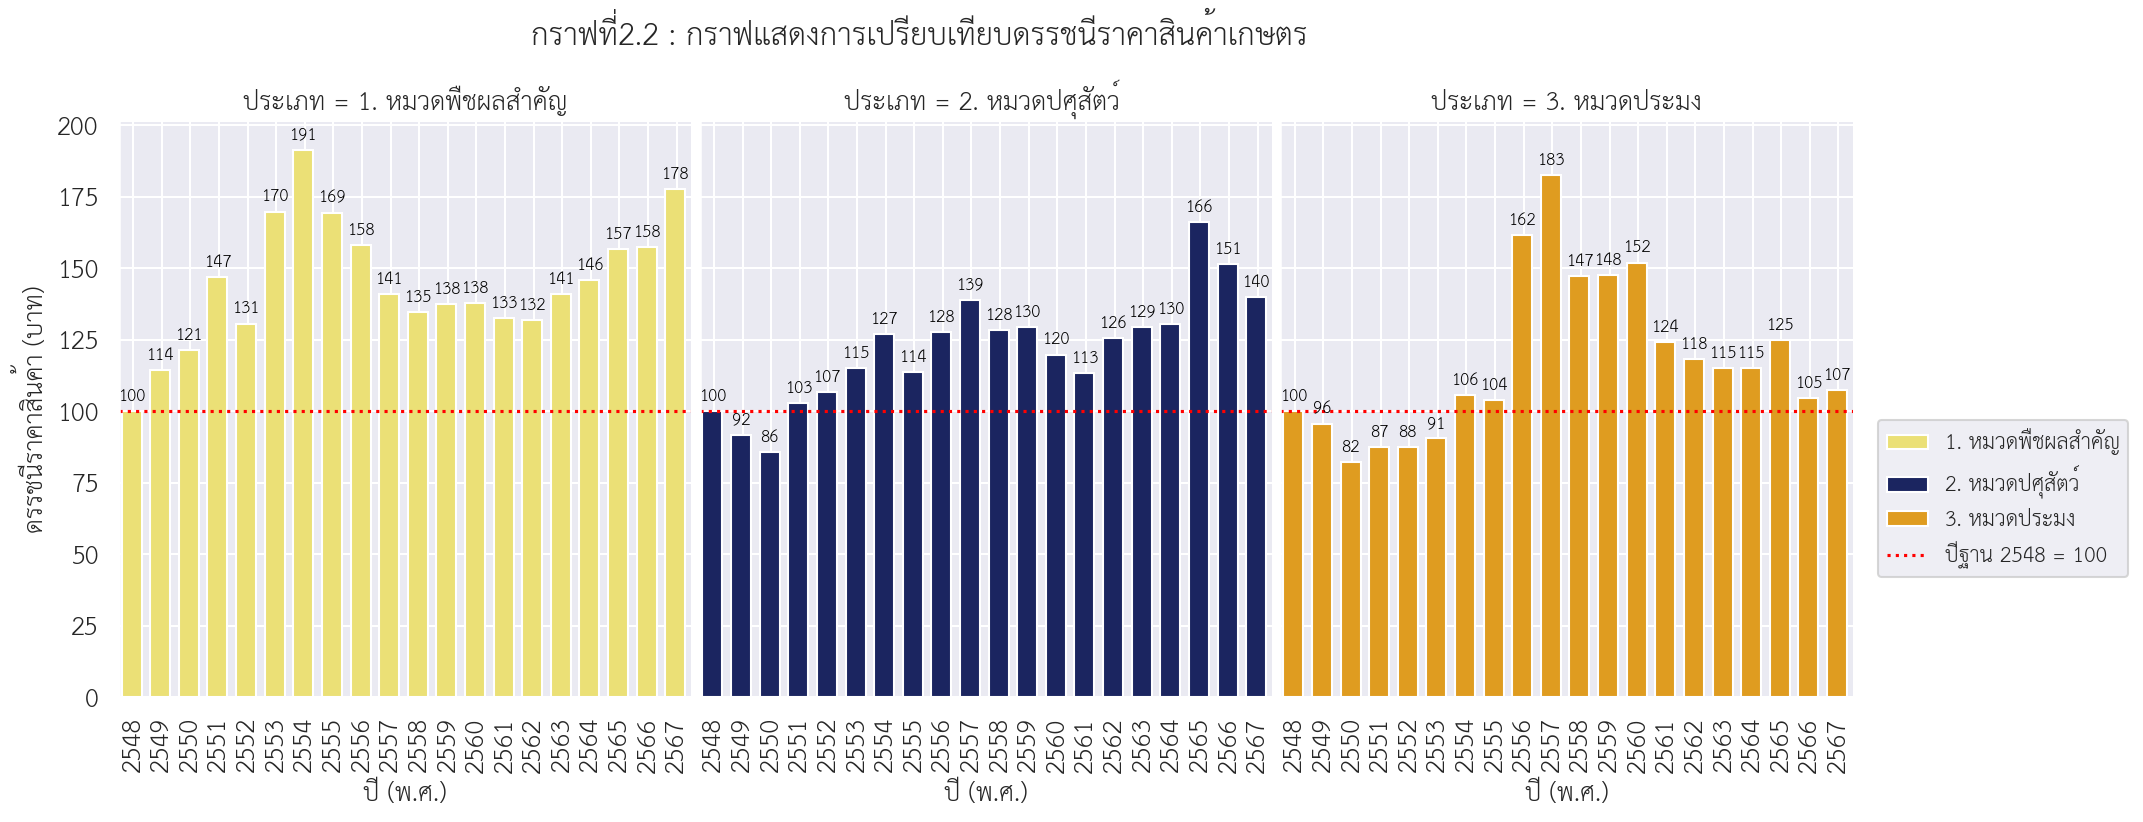

In [157]:
#2. กราฟแสดงการเปรียบเทียบดรรชนีราคาสินค้าเกษตร

# Figure setting
sns.set(rc=params)

# Create a bar plot using seaborn
selected_rows = ['1. หมวดพืชผลสำคัญ','2. หมวดปศุสัตว์ ','3. หมวดประมง']
g = sns.catplot(data=df4[df4['ประเภท'].isin(selected_rows)],
                kind='bar',
                x='Year',
                y='ดรรชนีราคาสินค้า',
                dodge = False,
                hue='ประเภท',
                hue_order=['1. หมวดพืชผลสำคัญ','2. หมวดปศุสัตว์ ','3. หมวดประมง'],
                col='ประเภท',
                row=None,
                height=5,
                aspect=2.5,
                alpha=1,
                palette=['#fff06292', '#101D6B', 'orange'])

# Set format chart
g.fig.set_size_inches(12.5, 5) # Set the figure size
g.fig.suptitle('กราฟที่2.2 : กราฟแสดงการเปรียบเทียบดรรชนีราคาสินค้าเกษตร', y=1.05, x=0.45)# Add title to the chart
g.set_axis_labels('ปี (พ.ศ.)', 'ดรรชนีราคาสินค้า (บาท)')# Add axis labels (x, y)
# Access the axes using g.axes instead of g.ax
for ax in g.axes.flat: # Iterate through all axes in the FacetGrid
    ax.xaxis.grid(True) # Set grid
    ax.yaxis.grid(True) # Set grid
    ax.set_xticks(df4['Year'].unique()) # Set x-axis ticks and labels to show every label
    ax.set_xticklabels(df4['Year'].unique(), rotation=90, ha='center') # Set x-axis

# Add a dotted line at y = 100
for ax in g.axes.flat:
    ax.axhline(y=100, color='red', linestyle='dotted', linewidth=1.5)

# Add y-values and adjust bar width and spacing
for ax in g.axes.flat: # Iterate through all axes in the FacetGrid
    for container in ax.containers: #removed extra space before for
        for bar in container:
            bar.set_width(0.7)  # Adjust bar width (default is ~0.8, now reduced)
            height = bar.get_height()
            ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points",ha='center', va='bottom', fontsize=8, color='black')

import matplotlib.lines as mlines  # Import Line2D for the legend

g._legend.remove()

# Rename the legend labels
g._legend.set_title('')
new_labels = ['1. หมวดพืชผลสำคัญ', '2. หมวดปศุสัตว์', '3. หมวดประมง']
for text, new_label in zip(g._legend.get_texts(), new_labels):
    text.set_text(new_label)

# Extract existing legend handles and labels
handles = g._legend.get_patches()  # Use get_patches() for categorical legend
labels = [text.get_text() for text in g._legend.get_texts()]

# Create a custom legend for the dotted line
dotted_line = mlines.Line2D([], [], color='red', linestyle='dotted', linewidth=1.5, label='ปีฐาน 2548 = 100')

# Append the dotted line handle and label
handles.append(dotted_line)
labels.append('ปีฐาน 2548 = 100')


# Display the combined legend in a suitable position
plt.legend(handles, labels, loc='upper right', fontsize=10, bbox_to_anchor=(1.5, 0.5))

plt.show()

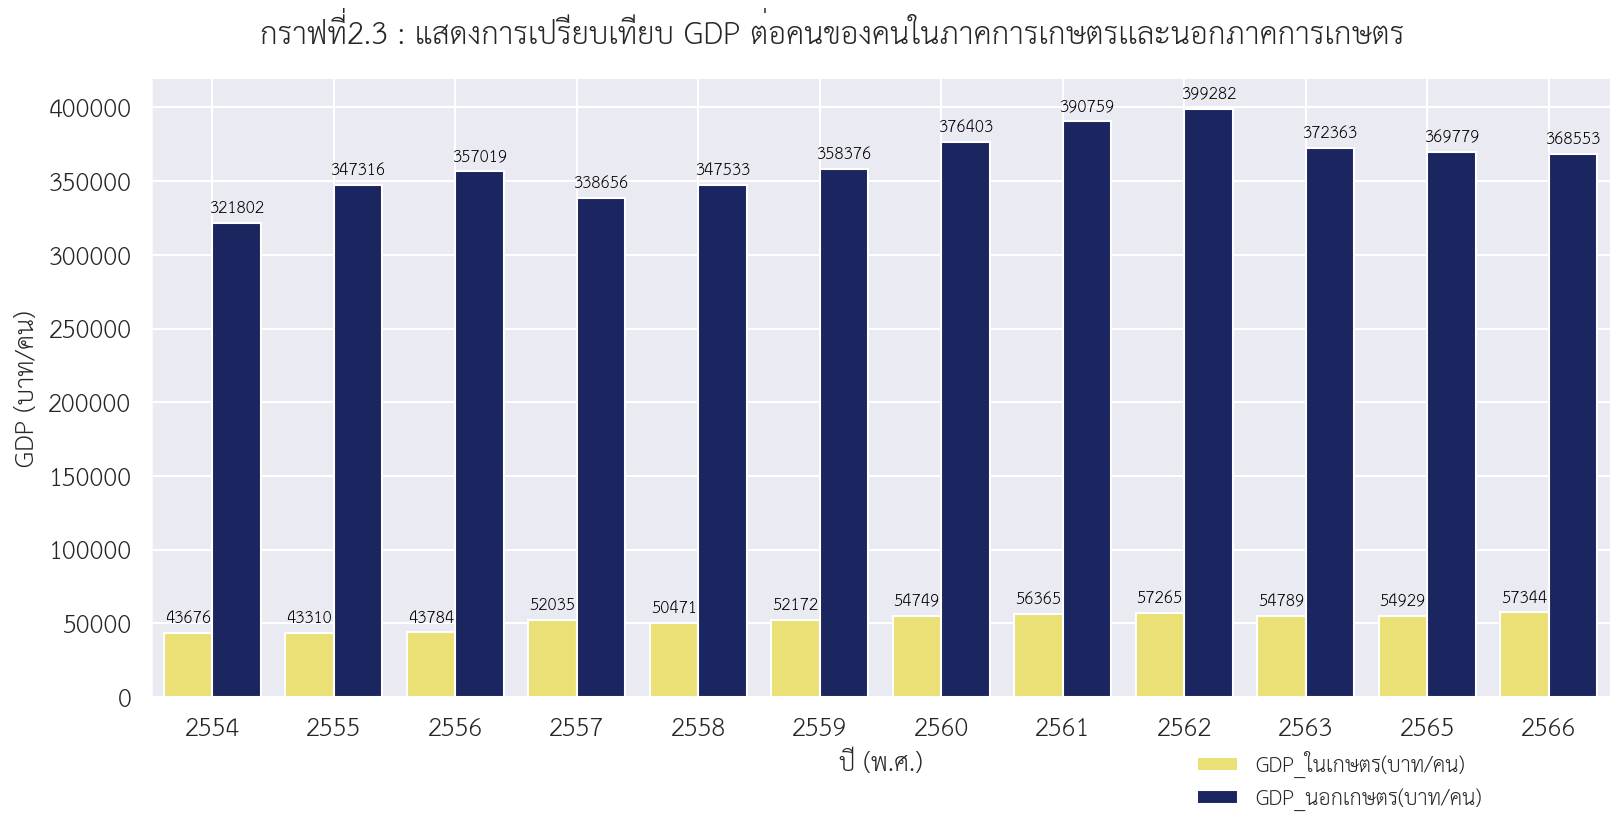

In [161]:
#2. กราฟแสดง การเปรียบเทียบ GDP ต่อคนของคนในภาคการเกษตาเเละนอกภาคการเกษตร

# Figure setting
sns.set(rc=params)

# Create a bar plot using seaborn
selected_rows = ['GDPต่อคน_เกษตร','GDPต่อคน_นอกเกษตร']
g = sns.catplot(data=unpivoted_df3[unpivoted_df3['ประเภท'].isin(selected_rows)],
                kind='bar',
                x='Year',
                y='Value',
                dodge = True,
                hue='ประเภท',
                col=None,
                row=None,
                height=5,
                aspect=2.5,
                alpha=1,
                palette=['#fff06292', '#101D6B'])

# Set format chart
g.fig.set_size_inches(12.5, 5) # Set the figure size
g.fig.suptitle('กราฟที่2.3 : แสดงการเปรียบเทียบ GDP ต่อคนของคนในภาคการเกษตรเเละนอกภาคการเกษตร', y=1.05, x=0.45)# Add title to the chart
g.set_axis_labels('ปี (พ.ศ.)', 'GDP (บาท/คน)')# Add axis labels (x, y)
ax = g.ax
ax.xaxis.grid(True) # Set grid
ax.yaxis.grid(True) # Set grid
#ax.set(ylim=(0, 70000)) # Set major y-axis
#ax.yaxis.set_major_locator(MultipleLocator(10000)) # Set minor y-axis
ax.set_xticks(unpivoted_df3['Year'].unique()) # Set x-axis ticks and labels to show every label
ax.set_xticklabels(unpivoted_df3['Year'].unique(), rotation=0, ha='center') # Set x-axis

# Add y-values and adjust bar width and spacing
for container in ax.containers: #removed extra space before for
    for bar in container:
        bar.set_width(0.4)  # Adjust bar width (default is ~0.8, now reduced)
        height = bar.get_height()
        ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points",ha='center', va='bottom', fontsize=8, color='black')
# Set Legend
g._legend.set_title('')
new_labels = ['GDP_ในเกษตร(บาท/คน)','GDP_นอกเกษตร(บาท/คน)']
for text, new_label in zip(g._legend.get_texts(), new_labels):
    text.set_text(new_label)
g._legend.set_bbox_to_anchor((0.8, 0.05))

plt.show()

GDP ต่อคนภาคนอกเกษตรเพิ่มขึ้นอย่างต่อเนื่อง ในขณะที่ภาคเกษตรเติบโตช้าและมีความผันผวน
ความเหลื่อมล้ำรายได้ชัดเจน เนื่องจาก GDP ต่อคนในภาคนอกเกษตรสูงกว่าภาคเกษตรถึง 10-15 เท่า ปี 2563 (โควิด) ส่งผลให้ GDP ต่อคนลดลงในทุกภาค แต่ภาคนอกเกษตรฟื้นตัวได้เร็วกว่า

In [159]:
# กราฟที่ xx วิเคราะห์รายได้ของภาคการเกษตรในช่วงปี พ.ศ.2554-พ.ศ.2566

!pip install gdown
!gdown --id 1twS2DF3Fo2PRiDYboE9XuqTE6lrWbrjh --output ผลิตภัณฑ์ประชาชาติภาคเกษตร.csv

#https://drive.google.com/file/d/1twS2DF3Fo2PRiDYboE9XuqTE6lrWbrjh/view?usp=sharing

# read_csv แบบมีheader
df2 = pd.read_csv('ผลิตภัณฑ์ประชาชาติภาคเกษตร.csv')

df2 = df2.drop(columns=df2.columns[3:])
df2

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1twS2DF3Fo2PRiDYboE9XuqTE6lrWbrjh
To: /content/ผลิตภัณฑ์ประชาชาติภาคเกษตร.csv
100% 1.02k/1.02k [00:00<00:00, 3.10MB/s]


,ประเภท,YYYY,หน่วย:พันล้านบาท
0,ภาคเกษตรกรรม,2554,638.5
1,ภาคเกษตรกรรม,2555,655.8
2,ภาคเกษตรกรรม,2556,660.4
3,ภาคเกษตรกรรม,2557,658.5
4,ภาคเกษตรกรรม,2558,615.9
5,ภาคเกษตรกรรม,2559,608.8
6,ภาคเกษตรกรรม,2560,638.1
7,ภาคเกษตรกรรม,2561,677.0
8,ภาคเกษตรกรรม,2562,670.4
9,ภาคเกษตรกรรม,2563,649.2


Columns in DataFrame: Index(['ประเภท', 'YYYY', 'หน่วย:พันล้านบาท'], dtype='object')


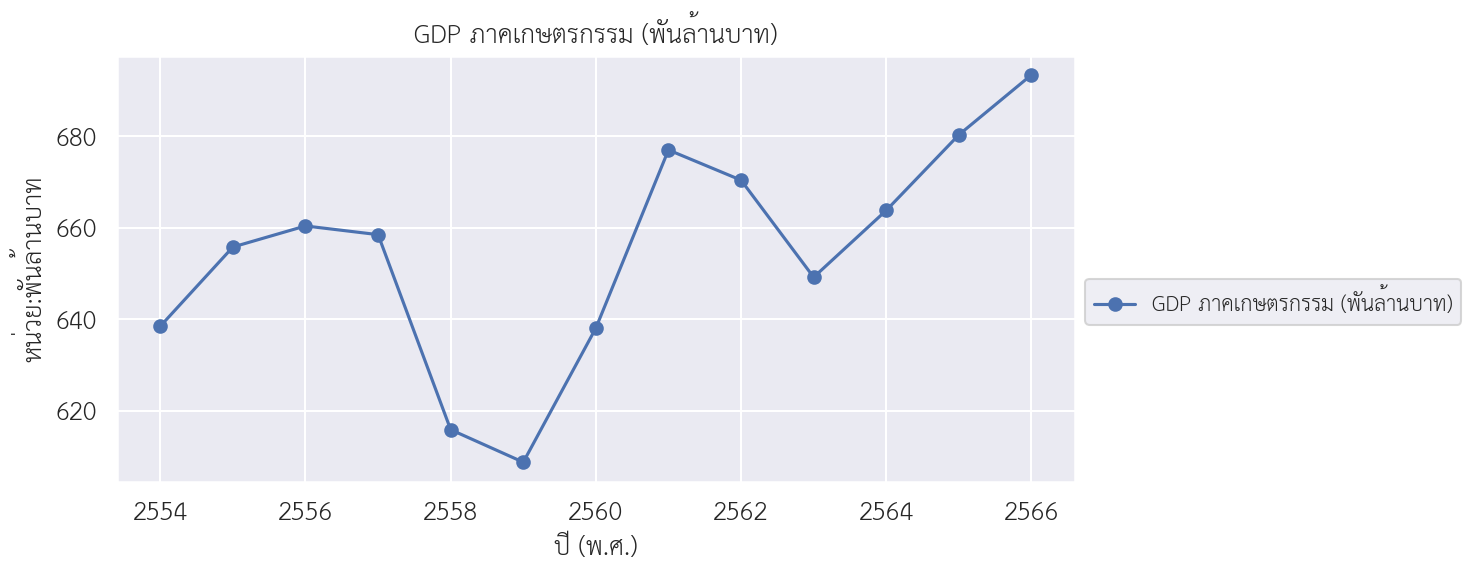

In [160]:
# ตรวจสอบชื่อคอลัมน์
print("Columns in DataFrame:", df2.columns)

# สร้างกราฟเส้น
plt.figure(figsize=(10, 4))
plt.plot(df2['YYYY'], df2['หน่วย:พันล้านบาท'], marker='o', label='GDP ภาคเกษตรกรรม (พันล้านบาท)')  # เพิ่ม label

# ปรับแต่งกราฟ
plt.title('GDP ภาคเกษตรกรรม (พันล้านบาท)')
plt.xlabel('ปี (พ.ศ.)')
plt.ylabel('หน่วย:พันล้านบาท')
plt.grid(True)
plt.xticks(rotation=None)

# สร้าง legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))  # เพิ่ม legend

# แสดงกราฟ
plt.tight_layout()
plt.show()

<p><b><font size="5">Part 3: การวิเคราะห์กลุ่มที่เป็นกำลังแรงงานนอกภาคการเกษตร</font></b><p>
<p><font size="4">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;วิเคราะห์แนวโน้มการเปลี่ยนแปลงของโครงสร้างกำลังแรงงานนอกภาคการเกษตรของประเทศไทยในช่วงปี พ.ศ. 2554 ถึง พ.ศ. 2567 โดยมุ่งเน้นการนำเสนอข้อมูลประชากรอายุ 15 ปีขึ้นไปที่อยู่ในกำลังแรงงานนอกภาคการเกษตร และจัดอันดับ 5 กลุ่มอุตสาหกรรมที่มีจำนวนแรงงานสูงสุดและต่ำสุด เพื่อให้เห็นภาพรวมของแรงงานในภาคเศรษฐกิจต่างๆ</font></p>

In [ ]:
def get_last_two_chars(col_name):
  """
  Extracts the last two characters of a column name,
  or returns the original name if it has less than 2 characters.
  """
  if len(str(col_name)) < 2:
    return str(col_name)
  return str(col_name)[-2:]

# Before grouping, convert all columns (except the first) to numeric, handling errors
for col in df.columns[1:]:
    try:
        df[col] = pd.to_numeric(df[col])  # Convert to numeric
    except ValueError:
        # Handle columns that cannot be converted to numeric, e.g., replace with NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

grouped_df = df.iloc[:, 1:].groupby(
    lambda col_name: get_last_two_chars(col_name), axis=1
).mean()

# Combine the first column of the original DataFrame with the calculated averages.
result_df = pd.concat([df.iloc[:, 0], grouped_df], axis=1)


In [ ]:
avg_non_agr_df = result_df.iloc[8:28, 1:].mean(axis=1)
avg_non_agr_df = avg_non_agr_df.rename("เฉลี่ยรวม")
result_avg_non_agr_df = pd.concat([result_df.iloc[8:28, 0], avg_non_agr_df], axis=1)

In [ ]:
# Sort the dataframe by the 'เฉลี่ยรวม' column in descending order
top_5_rows = result_avg_non_agr_df.nlargest(5, result_avg_non_agr_df.columns[1])
top_5_rows = top_5_rows.sort_values('เฉลี่ยรวม', ascending=True)

low_5_rows = result_avg_non_agr_df.nsmallest(5, result_avg_non_agr_df.columns[1])
low_5_rows = low_5_rows.sort_values('เฉลี่ยรวม', ascending=True)
# Create a bar chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# top
# Use ax1.set_xlim instead of ax1.xlim
ax1.set_xlim(0, top_5_rows['เฉลี่ยรวม'].max() + 500)
bars = ax1.barh(top_5_rows['ประเภท'], top_5_rows['เฉลี่ยรวม'])
#เพิ่มค่าจำนวนในกราฟ
for bar in bars:
    ax1.text(bar.get_width() + 50,  # ตำแหน่ง x (ค่าจำนวนคน)
             bar.get_y() + bar.get_height()/2,  # ตำแหน่ง y (ตรงกลางแท่ง)
             f'{bar.get_width():,.0f}',  # แสดงค่าพร้อมใส่ comma (,)
             va='center',  # จัดให้อยู่ตรงกลางของแท่ง
             fontsize=14)  # ขนาดตัวอักษร
ax1.set_xlabel('จำนวนคน (พันคน)')
ax1.set_ylabel('ประเภท', labelpad=30)
ax1.set_title('กราฟที่ 3.1: ค่าเฉลี่ยจำนวนแรงงานใน 5 อุตสาหกรรมนอกภาคการเกษตรที่มีจำนวนสูงสุด (พ.ศ. 2554-2567)', fontsize=20)

# low
# Use ax2.set_xlim instead of ax2.xlim
ax2.set_xlim(0, low_5_rows['เฉลี่ยรวม'].max() + 500)
bars = ax2.barh(low_5_rows['ประเภท'], low_5_rows['เฉลี่ยรวม'])
#เพิ่มค่าจำนวนในกราฟ
for bar in bars:
    plt.text(bar.get_width() + 5,  # ตำแหน่ง x (ค่าจำนวนคน)
             bar.get_y() + bar.get_height()/2,  # ตำแหน่ง y (ตรงกลางแท่ง)
             f'{bar.get_width():,.0f}',  # แสดงค่าพร้อมใส่ comma (,)
             va='center',  # จัดให้อยู่ตรงกลางของแท่ง
             fontsize=14)  # ขนาดตัวอักษร
ax2.set_xlabel('จำนวนคน (พันคน)')
ax2.set_ylabel('ประเภท', labelpad=30)
ax2.set_title('กราฟที่ 3.2: ค่าเฉลี่ยจำนวนแรงงานใน 5 อุตสาหกรรมนอกภาคการเกษตรที่มีจำนวนน้อยสุด (พ.ศ. 2554-2567)', fontsize=20)

plt.tight_layout()
plt.show()

จากกราฟนี้แสดงข้อมูลค่าเฉลี่ยจำนวนแรงงาน (พันคน) ใน 5 อุตสาหกรรมนอกภาคการเกษตรที่มีจำนวนแรงงานสูงสุด และ 5 อุตสาหกรรมที่มีจำนวนแรงงานต่ำสุด ในช่วงปี พ.ศ. 2554-2567
*   อุตสาหกรรมการขายส่งและการขายปลีก การซ่อมยานยนต์และรถจักรยานยนต์
และอุตสาหกรรมการผลิต มีจำนวนแรงงานเฉลี่ยสูงกว่าอุตสาหกรรมอื่นๆ
*   อุตสาหกรรมที่มีจำนวนแรงงานต่ำสุดส่วนใหญ่เป็นอุตสาหกรรมเฉพาะทาง หรือมีลักษณะการทำงานที่ไม่ต้องใช้แรงงานจำนวนมาก
*   ข้อมูลนี้แสดงให้เห็นถึงความแตกต่างของขนาดแรงงานในแต่ละอุตสาหกรรม ซึ่งอาจสะท้อนถึงความสำคัญและขนาดของภาคธุรกิจต่างๆ ในเศรษฐกิจของประเทศไทย


In [ ]:
df_non_fam = result_df.iloc[8:28, :]
df_non_fam = df_non_fam.rename(columns={"54": "2554", "55": "2555", "56": "2556", "57": "2557", "58": "2558", "59": "2559", "60": "2560",
                                         "61": "2561",  "62": "2562",  "63": "2563",  "64": "2564",  "65": "2565",  "66": "2566",  "67": "2567"})
df_melted_non_fam = pd.melt(df_non_fam, id_vars=['ประเภท'], var_name='ปีพศ', value_name='จำนวนคนเฉลี่ย')
#df_melted_non_fam.loc[:, 'ประเภท'] = df_melted_non_fam['ประเภท'].str.lstrip().str.rstrip()
# Get the list of 'ประเภท' values from top_10_rows
top_5_rows = result_avg_non_agr_df.nlargest(5, result_avg_non_agr_df.columns[1])
top_5_rows = top_5_rows.sort_values('เฉลี่ยรวม', ascending=True)
top_5_categories = top_5_rows['ประเภท'].tolist()

# Filter df_melted_non_fam based on the list of categories
top5_non_fam = df_melted_non_fam[df_melted_non_fam['ประเภท'].isin(top_5_categories)]

# Get the list of 'ประเภท' values from top_10_rows
low_5_rows = result_avg_non_agr_df.nsmallest(5, result_avg_non_agr_df.columns[1])
low_5_rows = low_5_rows.sort_values('เฉลี่ยรวม', ascending=True)
low_5_categories = low_5_rows['ประเภท'].tolist()

# Filter df_melted_non_fam based on the list of categories
low5_non_fam = df_melted_non_fam[df_melted_non_fam['ประเภท'].isin(low_5_categories)]

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# ax1
for category in top5_non_fam['ประเภท'].unique():
    category_data = top5_non_fam[top5_non_fam['ประเภท'] == category]
    ax1.scatter(category_data['ปีพศ'], category_data['จำนวนคนเฉลี่ย'], label = category.lstrip().rstrip())
    ax1.plot(category_data['ปีพศ'], category_data['จำนวนคนเฉลี่ย'])
ax1.set_xlabel('ปี (พ.ศ.)')
ax1.set_ylabel('จำนวนคน (พันคน)')
ax1.set_title('กราฟที่ 3.3: ค่าเฉลี่ยจำนวนแรงงานใน 5 กลุ่มอุตสาหกรรมนอกภาคการเกษตรที่มีขนาดใหญ่ที่สุด (พ.ศ. 2554-2567)', fontsize = 25, fontweight = 'bold')
ax1.grid(True)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 15)

#ax2
for category in low5_non_fam['ประเภท'].unique():
    category_data = low5_non_fam[low5_non_fam['ประเภท'] == category]
    ax2.scatter(category_data['ปีพศ'], category_data['จำนวนคนเฉลี่ย'], label = category.lstrip().rstrip())
    ax2.plot(category_data['ปีพศ'], category_data['จำนวนคนเฉลี่ย'])
ax2.set_xlabel('ปี (พ.ศ.)')
ax2.set_ylabel('จำนวนคน (พันคน)')
ax2.set_title('กราฟที่ 3.4: ค่าเฉลี่ยจำนวนแรงงานใน 5 กลุ่มอุตสาหกรรมนอกภาคการเกษตรที่มีขนาดเล็กที่สุด (พ.ศ. 2554-2567)', fontsize = 25, fontweight = 'bold')
ax2.grid(True)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 15)

plt.tight_layout()
plt.show()

จากกราฟนี้แสดงข้อมูลค่าเฉลี่ยจำนวนแรงงาน (พันคน) ในแต่ละปี ใน
 5 กลุ่มอุตสาหกรรมนอกภาคการเกษตรที่มีขนาดใหญ่ที่สุด และ 5 กลุ่มอุตสาหกรรมที่มีขนาดเล็กที่สุด ในช่วงปี พ.ศ. 2554-2567
* อุตสาหกรรมที่มีขนาดใหญ่ที่สุดมีจำนวนแรงงานเฉลี่ยมากกว่าอุตสาหกรรมที่มีขนาดเล็กที่สุดอย่างมีนัยสำคัญ
* อุตสาหกรรมการขายส่งและการขายปลีก การซ่อมยานยนต์และรถจักรยานยนต์ เป็นอุตสาหกรรมที่มีขนาดแรงงานใหญ่ที่สุดและมีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่อง
* อุตสาหกรรมที่มีขนาดเล็กที่สุดส่วนใหญ่เป็นอุตสาหกรรมเฉพาะทาง หรือมีลักษณะการทำงานที่ไม่ต้องใช้แรงงานจำนวนมาก
* ข้อมูลนี้แสดงให้เห็นถึงความแตกต่างของขนาดแรงงานในแต่ละอุตสาหกรรม ซึ่งอาจสะท้อนถึงความสำคัญและขนาดของภาคธุรกิจต่างๆ ในเศรษฐกิจของประเทศไทย

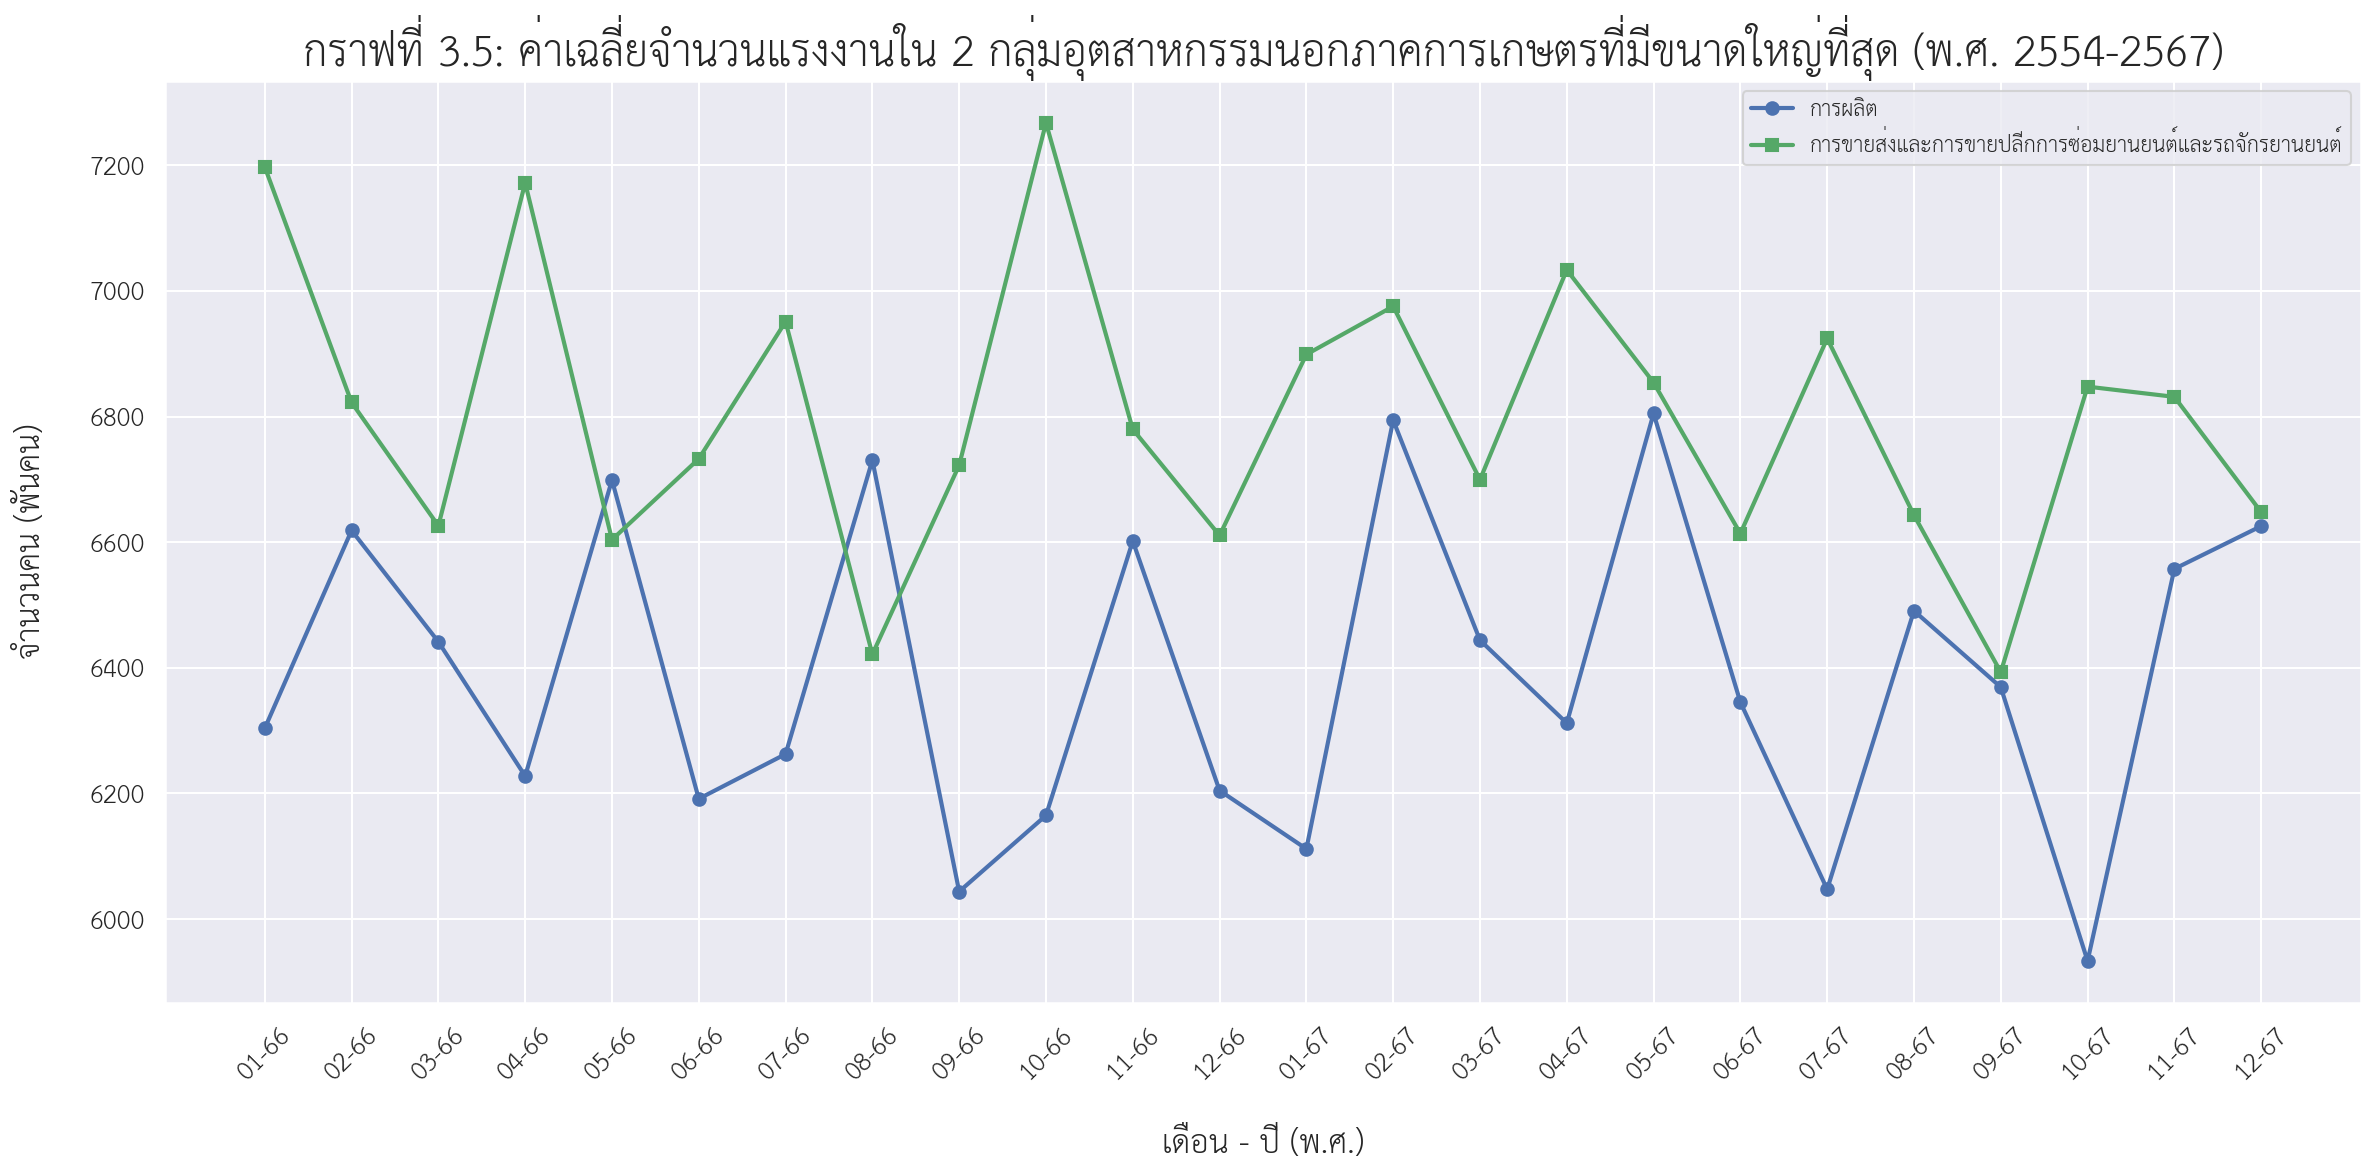

In [162]:
# Data for the two categories
filtered_df = df[df['ประเภท'].isin(top_5_categories)]
last_24_months = filtered_df.columns[-24:]
industries = top_5_categories[-2:]

top1_month = df[df["ประเภท"] == industries[0]].copy() # Create a copy to avoid SettingWithCopyWarning
top2_month = df[df["ประเภท"] == industries[1]].copy() # Create a copy to avoid SettingWithCopyWarning

plt.figure(figsize=(16, 8))  # Adjust figure size for better visualization

# Convert the relevant columns to numeric, handling errors
for col in last_24_months:
    top1_month.loc[:, col] = pd.to_numeric(top1_month[col], errors='coerce')
    top2_month.loc[:, col] = pd.to_numeric(top2_month[col], errors='coerce')

# Now plot the data
plt.plot(last_24_months, top1_month[last_24_months].values[0], label=industries[0].strip(), marker='o', color='b', linestyle='-', linewidth=2)
plt.plot(last_24_months, top2_month[last_24_months].values[0], label=industries[1].strip(), marker='s', color='g', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('เดือน - ปี (พ.ศ.)', fontsize=15, labelpad=20)
plt.ylabel('จำนวนคน (พันคน)', fontsize=15, labelpad=20)
plt.title('กราฟที่ 3.5: ค่าเฉลี่ยจำนวนแรงงานใน 2 กลุ่มอุตสาหกรรมนอกภาคการเกษตรที่มีขนาดใหญ่ที่สุด (พ.ศ. 2554-2567)', fontsize=20 )
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

จากกราฟนี้แสดง จำนวนแรงงาน (พันคน) รายเดือน ใน 2 กลุ่มอุตสาหกรรมนอกภาคการเกษตรที่มีขนาดใหญ่ที่สุด ในช่วงปี พ.ศ. 2554-2567
* อุตสาหกรรมการขายส่งและการขายปลีก การซ่อมยานยนต์และรถจักรยานยนต์ มีจำนวนแรงงานเฉลี่ยสูงกว่าอุตสาหกรรมการผลิตอย่างเห็นได้ชัดตลอดช่วงเวลาที่แสดง
* ทั้งสองอุตสาหกรรมมีแนวโน้มการเปลี่ยนแปลงของจำนวนแรงงานที่ไม่คงที่ โดยมีช่วงที่เพิ่มขึ้นและลดลงสลับกันไป
* ในช่วงปลายปี พ.ศ. 2566 ถึงต้นปี พ.ศ. 2567 ทั้งสองอุตสาหกรรมมีแนวโน้มจำนวนแรงงานลดลง
* จากนั้น ในช่วงปี พ.ศ. 2567 เดือน 02 จนถึงเดือน 12 แรงงานในอุตสาหกรรม การขายส่งและการขายปลีก การซ่อมยานยนต์และรถจักรยานยนต์ มีแนวโน้มเพิ่มขึ้นอย่างเห็นได้ชัด ในช่วงเวลาเดียวกันนั้นเอง อุตสาหกรรมการผลิต กลับมีแนวโน้มลดลงอย่างเห็นได้ชัด
* กราฟนี้แสดงให้เห็นถึงความผันผวนของจำนวนแรงงานในสองอุตสาหกรรมหลัก ซึ่งอาจสะท้อนถึงปัจจัยทางเศรษฐกิจและสังคมที่ส่งผลกระทบต่อตลาดแรงงานในช่วงเวลาดังกล่าว